In [1]:
# 라이브러리 추출
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
df = pd.read_csv('D:/project/TeamProject1/colabo/Data/binary_classification_data.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
from sklearn.model_selection import train_test_split
TRAIN_RATIO = 0.8
# 학습 데이터 분리
X = df.drop('target_class', axis=1)
y = df['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_RATIO, random_state = 83)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14318, 8) (3580, 8) (14318,) (3580,)


In [4]:
from sklearn.model_selection import train_test_split
TRAIN_RATIO = 0.8
# 학습 데이터 분리
X = df.drop('target_class', axis=1)
y = df['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_RATIO, random_state = 83)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14318, 8) (3580, 8) (14318,) (3580,)


In [5]:
y_train.value_counts(1)

target_class
0    0.909345
1    0.090655
Name: proportion, dtype: float64

In [6]:
y_train.value_counts()

target_class
0    13020
1     1298
Name: count, dtype: int64

<Axes: ylabel='count'>

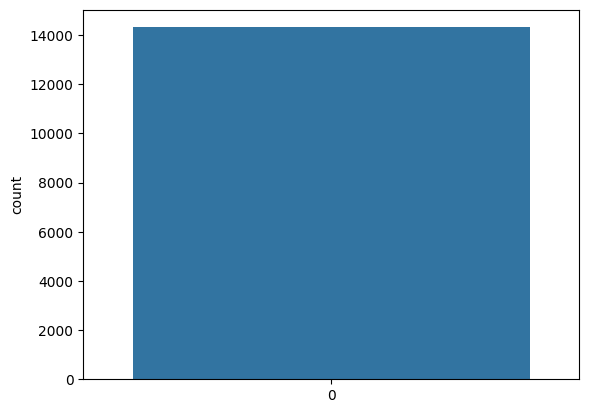

In [7]:
import seaborn as sns
sns.countplot(y_train)

<br>데이터셋은 매우 불균형합니다. 
<br>펄서가 1,153개이고 펄서가 아닌 것은 11,375개입니다. 
<br>모델 구축 과정 전에 데이터셋을 샘플링해야 할 수도 있습니다.
<br>
<br>분류 모델을 평가하기 위해 고려해야 할 가장 중요한 지표는 F1 점수와 재현율입니다. 
<br>이는 대상 클래스가 극도로 적기 때문에 중요합니다.

In [8]:
y_train_1 = y_train[y_train == 1] #creating a dataset for only true pulsars for EDA
y_train_0 = y_train[y_train == 0] #creating a dataset for only non pulsars for EDA
print(y_train_1.shape, y_train_0.shape)

(1298,) (13020,)


In [9]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.datasets import load_iris
%matplotlib inline
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import warnings
warnings.filterwarnings(action='ignore')

In [10]:
ss=StandardScaler() 
X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

In [11]:
SVM = svm.SVC(random_state=42).fit(X_trains, y_train)

In [12]:
SVM_param_grid = {'C': [0.01,0.1, 1, 10],  
              'gamma': [0.09, 0.1, 0.2, 0.001], 
              'kernel': ['rbf'],
              'tol':[0.001,0.0001],
              'degree':[2,3]}

SVM_grid1 = GridSearchCV(SVM, param_grid = SVM_param_grid, cv = 5, n_jobs=-1)

In [13]:
SVM_grid1.fit(X_trains, y_train) 

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [2, 3],
                         'gamma': [0.09, 0.1, 0.2, 0.001], 'kernel': ['rbf'],
                         'tol': [0.001, 0.0001]})

In [14]:
SVM_grid1.best_estimator_

SVC(C=10, degree=2, gamma=0.2, random_state=42)

In [15]:
SVM_grid = svm.SVC(C=10,degree=2, gamma=0.2, kernel='rbf', random_state=42)
SVM_grid.fit(X_trains, y_train)

SVC(C=10, degree=2, gamma=0.2, random_state=42)

In [16]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, SVM_grid.predict(X_trains)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, SVM_grid.predict(X_tests)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.99      1.00      0.99     13020
           1       0.95      0.86      0.90      1298

    accuracy                           0.98     14318
   macro avg       0.97      0.93      0.95     14318
weighted avg       0.98      0.98      0.98     14318
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3239
           1       0.95      0.82      0.88       341

    accuracy                           0.98      3580
   macro avg       0.97      0.91      0.94      3580
weighted avg       0.98      0.98      0.98      3580
 



In [17]:
y_pred = SVM_grid.predict(X_tests)
print( "SVM best accuracy : " + str(np.round(metrics.accuracy_score(y_test,y_pred),3)))

SVM best accuracy : 0.979


In [19]:
print("Precision Score : ",precision_score(y_test, y_pred))
print("Recall Score : ",recall_score(y_test, y_pred))

Precision Score :  0.9523809523809523
Recall Score :  0.8211143695014663


딥러닝 모델링

In [20]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *

Relu, Adam, 은닉층 3개, 배치정규화, 임계값 0.5

In [36]:
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score

# 모델 정의
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_trains.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam()
model1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 학습 자동 중단 설정
es = EarlyStopping(monitor='loss', patience=50, mode='min')
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=40, mode='min')

# 모델 학습
model1.fit(X_trains, y_train, epochs=300, batch_size=100, verbose=1, 
          validation_split=0.2, callbacks=[es, rlrp])

# 모델 평가
y_pred = model1.predict(X_tests)
y_pred_class = (y_pred > 0.5).astype(int)

loss, accuracy = model1.evaluate(X_tests, y_test, verbose=0)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)

print(f'Accuracy: {accuracy}\nLoss: {loss}\nPrecision: {precision}\nRecall: {recall}')


Epoch 1/300
115/115 [==============================] - 2s 4ms/step - loss: 0.2883 - accuracy: 0.9546 - val_loss: 0.1686 - val_accuracy: 0.9738 - lr: 0.0010
Epoch 2/300
115/115 [==============================] - 0s 2ms/step - loss: 0.1414 - accuracy: 0.9779 - val_loss: 0.0982 - val_accuracy: 0.9759 - lr: 0.0010
Epoch 3/300
115/115 [==============================] - 0s 2ms/step - loss: 0.1021 - accuracy: 0.9783 - val_loss: 0.0821 - val_accuracy: 0.9749 - lr: 0.0010
Epoch 4/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0942 - accuracy: 0.9778 - val_loss: 0.0678 - val_accuracy: 0.9811 - lr: 0.0010
Epoch 5/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0834 - accuracy: 0.9782 - val_loss: 0.0661 - val_accuracy: 0.9822 - lr: 0.0010
Epoch 6/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0809 - accuracy: 0.9789 - val_loss: 0.0625 - val_accuracy: 0.9818 - lr: 0.0010
Epoch 7/300
115/115 [==============================] - 0s 2ms/st

임계값을 0.3으로 조정하면 recall 값이 향상 될 것이다. -> 오히려 줄어들고, 정밀도도 줄어들었음.

In [38]:
# 모델 정의
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_trains.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam()
model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 학습 자동 중단 설정
es = EarlyStopping(monitor='loss', patience=50, mode='min')
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=40, mode='min')

# 모델 학습
model2.fit(X_trains, y_train, epochs=300, batch_size=100, verbose=1, 
          validation_split=0.2, callbacks=[es, rlrp])

# 모델 평가
y_pred = model2.predict(X_tests)
y_pred_class = (y_pred > 0.3).astype(int)

loss, accuracy = model2.evaluate(X_tests, y_test, verbose=0)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)

print(f'Accuracy: {accuracy}\nLoss: {loss}\nPrecision: {precision}\nRecall: {recall}')

Epoch 1/300
115/115 [==============================] - 2s 4ms/step - loss: 0.2784 - accuracy: 0.9467 - val_loss: 0.2121 - val_accuracy: 0.9738 - lr: 0.0010
Epoch 2/300
115/115 [==============================] - 0s 2ms/step - loss: 0.1372 - accuracy: 0.9768 - val_loss: 0.1105 - val_accuracy: 0.9766 - lr: 0.0010
Epoch 3/300
115/115 [==============================] - 0s 2ms/step - loss: 0.1005 - accuracy: 0.9775 - val_loss: 0.0806 - val_accuracy: 0.9787 - lr: 0.0010
Epoch 4/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0874 - accuracy: 0.9783 - val_loss: 0.0669 - val_accuracy: 0.9801 - lr: 0.0010
Epoch 5/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0821 - accuracy: 0.9790 - val_loss: 0.0629 - val_accuracy: 0.9804 - lr: 0.0010
Epoch 6/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0887 - accuracy: 0.9786 - val_loss: 0.0680 - val_accuracy: 0.9829 - lr: 0.0010
Epoch 7/300
115/115 [==============================] - 0s 2ms/st

임계값을 0.2로 조정하면 recall 값이 향상 될 것이다. -> 0.5보다 미세하게 향상되었지만, 정밀도가 떨어졌음.

In [39]:
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score

# 모델 정의
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_trains.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam()
model3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 학습 자동 중단 설정
es = EarlyStopping(monitor='loss', patience=50, mode='min')
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=40, mode='min')

# 모델 학습
model3.fit(X_trains, y_train, epochs=300, batch_size=100, verbose=1, 
          validation_split=0.2, callbacks=[es, rlrp])

# 모델 평가
y_pred = model3.predict(X_tests)
y_pred_class = (y_pred > 0.2).astype(int)

loss, accuracy = model3.evaluate(X_tests, y_test, verbose=0)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)

print(f'Accuracy: {accuracy}\nLoss: {loss}\nPrecision: {precision}\nRecall: {recall}')

Epoch 1/300
115/115 [==============================] - 2s 4ms/step - loss: 0.2589 - accuracy: 0.9510 - val_loss: 0.1703 - val_accuracy: 0.9742 - lr: 0.0010
Epoch 2/300
115/115 [==============================] - 0s 2ms/step - loss: 0.1287 - accuracy: 0.9765 - val_loss: 0.1050 - val_accuracy: 0.9745 - lr: 0.0010
Epoch 3/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0975 - accuracy: 0.9801 - val_loss: 0.0829 - val_accuracy: 0.9815 - lr: 0.0010
Epoch 4/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0915 - accuracy: 0.9760 - val_loss: 0.0685 - val_accuracy: 0.9791 - lr: 0.0010
Epoch 5/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0889 - accuracy: 0.9783 - val_loss: 0.0646 - val_accuracy: 0.9815 - lr: 0.0010
Epoch 6/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0843 - accuracy: 0.9790 - val_loss: 0.0652 - val_accuracy: 0.9815 - lr: 0.0010
Epoch 7/300
115/115 [==============================] - 0s 2ms/st

임계값을 0.1로 조정하면 recall 값이 향상 될 것이다. -> 현재까지 가장 높은 점수가 나왔지만, 정밀도가 떨어졌음.

In [40]:
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score

# 모델 정의
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_trains.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam()
model4.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 학습 자동 중단 설정
es = EarlyStopping(monitor='loss', patience=50, mode='min')
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=40, mode='min')

# 모델 학습
model4.fit(X_trains, y_train, epochs=300, batch_size=100, verbose=1, 
          validation_split=0.2, callbacks=[es, rlrp])

# 모델 평가
y_pred = model4.predict(X_tests)
y_pred_class = (y_pred > 0.1).astype(int)

loss, accuracy = model4.evaluate(X_tests, y_test, verbose=0)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)

print(f'Accuracy: {accuracy}\nLoss: {loss}\nPrecision: {precision}\nRecall: {recall}')

Epoch 1/300
115/115 [==============================] - 2s 4ms/step - loss: 0.2775 - accuracy: 0.9532 - val_loss: 0.2276 - val_accuracy: 0.9745 - lr: 0.0010
Epoch 2/300
115/115 [==============================] - 0s 3ms/step - loss: 0.1314 - accuracy: 0.9771 - val_loss: 0.1374 - val_accuracy: 0.9728 - lr: 0.0010
Epoch 3/300
115/115 [==============================] - 0s 2ms/step - loss: 0.1004 - accuracy: 0.9784 - val_loss: 0.0862 - val_accuracy: 0.9787 - lr: 0.0010
Epoch 4/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0891 - accuracy: 0.9783 - val_loss: 0.0746 - val_accuracy: 0.9804 - lr: 0.0010
Epoch 5/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0809 - accuracy: 0.9791 - val_loss: 0.0660 - val_accuracy: 0.9818 - lr: 0.0010
Epoch 6/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0779 - accuracy: 0.9780 - val_loss: 0.0636 - val_accuracy: 0.9825 - lr: 0.0010
Epoch 7/300
115/115 [==============================] - 0s 2ms/st

타겟값에 데이터 불균형이 있어 임계값을 낮춰서 진행해보았지만 재현율 점수 증가에 큰 기여를 하지 못하고 정밀도가 떨어짐.

임계값은 0.5로 고정 / 옵티마이저, activation 변경

LeakyReLU, Adamax -> 정밀도는 더 좋아졌으나 재현율 값이 감소함.

In [42]:
# 모델 정의
model5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='LeakyReLU', input_shape=(X_trains.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='LeakyReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='LeakyReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='LeakyReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adamax()
model5.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 학습 자동 중단 설정
es = EarlyStopping(monitor='loss', patience=50, mode='min')
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=40, mode='min')

# 모델 학습
model5.fit(X_trains, y_train, epochs=300, batch_size=100, verbose=1, 
          validation_split=0.2, callbacks=[es, rlrp])

# 모델 평가
y_pred = model5.predict(X_tests)
y_pred_class = (y_pred > 0.5).astype(int)

loss, accuracy = model5.evaluate(X_tests, y_test, verbose=0)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)

print(f'Accuracy: {accuracy}\nLoss: {loss}\nPrecision: {precision}\nRecall: {recall}')

Epoch 1/300
115/115 [==============================] - 1s 4ms/step - loss: 0.2984 - accuracy: 0.9471 - val_loss: 0.4788 - val_accuracy: 0.9344 - lr: 0.0010
Epoch 2/300
115/115 [==============================] - 0s 2ms/step - loss: 0.1720 - accuracy: 0.9748 - val_loss: 0.2717 - val_accuracy: 0.9735 - lr: 0.0010
Epoch 3/300
115/115 [==============================] - 0s 2ms/step - loss: 0.1297 - accuracy: 0.9770 - val_loss: 0.1477 - val_accuracy: 0.9815 - lr: 0.0010
Epoch 4/300
115/115 [==============================] - 0s 2ms/step - loss: 0.1156 - accuracy: 0.9772 - val_loss: 0.0941 - val_accuracy: 0.9811 - lr: 0.0010
Epoch 5/300
115/115 [==============================] - 0s 3ms/step - loss: 0.1041 - accuracy: 0.9766 - val_loss: 0.0778 - val_accuracy: 0.9818 - lr: 0.0010
Epoch 6/300
115/115 [==============================] - 0s 2ms/step - loss: 0.0963 - accuracy: 0.9776 - val_loss: 0.0696 - val_accuracy: 0.9818 - lr: 0.0010
Epoch 7/300
115/115 [==============================] - 0s 2ms/st

Swish, SGD -> 정밀도가 굉장히 높지만, 재현율이 감소함.

In [43]:
# 모델 정의
model6 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='swish', input_shape=(X_trains.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='swish'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='swish'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='swish'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.SGD()
model6.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 학습 자동 중단 설정
es = EarlyStopping(monitor='loss', patience=50, mode='min')
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=40, mode='min')

# 모델 학습
model6.fit(X_trains, y_train, epochs=300, batch_size=100, verbose=1, 
          validation_split=0.2, callbacks=[es, rlrp])

# 모델 평가
y_pred = model6.predict(X_tests)
y_pred_class = (y_pred > 0.5).astype(int)

loss, accuracy = model6.evaluate(X_tests, y_test, verbose=0)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)

print(f'Accuracy: {accuracy}\nLoss: {loss}\nPrecision: {precision}\nRecall: {recall}')

Epoch 1/300
115/115 [==============================] - 1s 4ms/step - loss: 0.2929 - accuracy: 0.9463 - val_loss: 0.3116 - val_accuracy: 0.9462 - lr: 0.0100
Epoch 2/300
115/115 [==============================] - 0s 3ms/step - loss: 0.1613 - accuracy: 0.9756 - val_loss: 0.1856 - val_accuracy: 0.9581 - lr: 0.0100
Epoch 3/300
115/115 [==============================] - 0s 3ms/step - loss: 0.1287 - accuracy: 0.9767 - val_loss: 0.1250 - val_accuracy: 0.9735 - lr: 0.0100
Epoch 4/300
115/115 [==============================] - 0s 3ms/step - loss: 0.1145 - accuracy: 0.9767 - val_loss: 0.0956 - val_accuracy: 0.9784 - lr: 0.0100
Epoch 5/300
115/115 [==============================] - 0s 3ms/step - loss: 0.0997 - accuracy: 0.9775 - val_loss: 0.0814 - val_accuracy: 0.9801 - lr: 0.0100
Epoch 6/300
115/115 [==============================] - 0s 3ms/step - loss: 0.0962 - accuracy: 0.9787 - val_loss: 0.0754 - val_accuracy: 0.9804 - lr: 0.0100
Epoch 7/300
115/115 [==============================] - 0s 3ms/st

elu, Adagrad -> 정밀도가 제일 높지만, 재현율이 감소함.

In [44]:
# 모델 정의
model7 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='elu', input_shape=(X_trains.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='elu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adagrad()
model7.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 학습 자동 중단 설정
es = EarlyStopping(monitor='loss', patience=50, mode='min')
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=40, mode='min')

# 모델 학습
model7.fit(X_trains, y_train, epochs=300, batch_size=100, verbose=1, 
          validation_split=0.2, callbacks=[es, rlrp])

# 모델 평가
y_pred = model7.predict(X_tests)
y_pred_class = (y_pred > 0.5).astype(int)

loss, accuracy = model7.evaluate(X_tests, y_test, verbose=0)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)

print(f'Accuracy: {accuracy}\nLoss: {loss}\nPrecision: {precision}\nRecall: {recall}')

Epoch 1/300
115/115 [==============================] - 1s 4ms/step - loss: 0.4417 - accuracy: 0.8860 - val_loss: 0.4798 - val_accuracy: 0.8928 - lr: 0.0010
Epoch 2/300
115/115 [==============================] - 0s 2ms/step - loss: 0.3323 - accuracy: 0.9530 - val_loss: 0.4445 - val_accuracy: 0.8659 - lr: 0.0010
Epoch 3/300
115/115 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.9607 - val_loss: 0.3617 - val_accuracy: 0.9441 - lr: 0.0010
Epoch 4/300
115/115 [==============================] - 0s 3ms/step - loss: 0.2712 - accuracy: 0.9638 - val_loss: 0.2783 - val_accuracy: 0.9728 - lr: 0.0010
Epoch 5/300
115/115 [==============================] - 0s 2ms/step - loss: 0.2560 - accuracy: 0.9672 - val_loss: 0.2370 - val_accuracy: 0.9811 - lr: 0.0010
Epoch 6/300
115/115 [==============================] - 0s 2ms/step - loss: 0.2426 - accuracy: 0.9692 - val_loss: 0.2090 - val_accuracy: 0.9815 - lr: 0.0010
Epoch 7/300
115/115 [==============================] - 0s 2ms/st

LeakyReLU, Adagrad (chat gpt 추천 조합) -> 정밀도는 높지만, 재현율이 감소함.

In [45]:
# 모델 정의
model8 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='LeakyReLU', input_shape=(X_trains.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='LeakyReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='LeakyReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='LeakyReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adagrad()
model8.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 학습 자동 중단 설정
es = EarlyStopping(monitor='loss', patience=50, mode='min')
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=40, mode='min')

# 모델 학습
model8.fit(X_trains, y_train, epochs=300, batch_size=100, verbose=1, 
          validation_split=0.2, callbacks=[es, rlrp])

# 모델 평가
y_pred = model8.predict(X_tests)
y_pred_class = (y_pred > 0.5).astype(int)

loss, accuracy = model8.evaluate(X_tests, y_test, verbose=0)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)

print(f'Accuracy: {accuracy}\nLoss: {loss}\nPrecision: {precision}\nRecall: {recall}')

Epoch 1/300
115/115 [==============================] - 1s 4ms/step - loss: 0.4971 - accuracy: 0.8241 - val_loss: 0.5402 - val_accuracy: 0.9050 - lr: 0.0010
Epoch 2/300
115/115 [==============================] - 0s 2ms/step - loss: 0.3610 - accuracy: 0.9469 - val_loss: 0.4344 - val_accuracy: 0.9228 - lr: 0.0010
Epoch 3/300
115/115 [==============================] - 0s 2ms/step - loss: 0.3154 - accuracy: 0.9593 - val_loss: 0.3549 - val_accuracy: 0.9476 - lr: 0.0010
Epoch 4/300
115/115 [==============================] - 0s 2ms/step - loss: 0.2855 - accuracy: 0.9664 - val_loss: 0.2905 - val_accuracy: 0.9672 - lr: 0.0010
Epoch 5/300
115/115 [==============================] - 0s 2ms/step - loss: 0.2664 - accuracy: 0.9681 - val_loss: 0.2489 - val_accuracy: 0.9777 - lr: 0.0010
Epoch 6/300
115/115 [==============================] - 0s 2ms/step - loss: 0.2532 - accuracy: 0.9692 - val_loss: 0.2276 - val_accuracy: 0.9811 - lr: 0.0010
Epoch 7/300
115/115 [==============================] - 0s 2ms/st

현재까지는 ReLU, Adam 조합이 가장 이상적인 모습이라고 판단됨.
이번에는 ReLU, Adam 고정하고 에포크, 배치사이즈, 은닉층에 변화를 주겠음.

은닉층 6개로 증가, 노드 수 점차 감소 -> 정밀도가 감소하였지만 재현율이 증가함.

In [46]:
# 모델 정의
model9 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='ReLU', input_shape=(X_trains.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(8, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam()
model9.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 학습 자동 중단 설정
es = EarlyStopping(monitor='loss', patience=50, mode='min')
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=40, mode='min')

# 모델 학습
model9.fit(X_trains, y_train, epochs=300, batch_size=100, verbose=1, 
          validation_split=0.2, callbacks=[es, rlrp])

# 모델 평가
y_pred = model9.predict(X_tests)
y_pred_class = (y_pred > 0.5).astype(int)

loss, accuracy = model9.evaluate(X_tests, y_test, verbose=0)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)

print(f'Accuracy: {accuracy}\nLoss: {loss}\nPrecision: {precision}\nRecall: {recall}')

Epoch 1/300
115/115 [==============================] - 3s 6ms/step - loss: 0.4691 - accuracy: 0.9265 - val_loss: 0.4417 - val_accuracy: 0.9787 - lr: 0.0010
Epoch 2/300
115/115 [==============================] - 1s 4ms/step - loss: 0.2798 - accuracy: 0.9766 - val_loss: 0.2887 - val_accuracy: 0.9731 - lr: 0.0010
Epoch 3/300
115/115 [==============================] - 1s 5ms/step - loss: 0.1725 - accuracy: 0.9772 - val_loss: 0.1293 - val_accuracy: 0.9797 - lr: 0.0010
Epoch 4/300
115/115 [==============================] - 1s 5ms/step - loss: 0.1272 - accuracy: 0.9754 - val_loss: 0.0949 - val_accuracy: 0.9811 - lr: 0.0010
Epoch 5/300
115/115 [==============================] - 1s 4ms/step - loss: 0.1005 - accuracy: 0.9775 - val_loss: 0.0812 - val_accuracy: 0.9818 - lr: 0.0010
Epoch 6/300
115/115 [==============================] - 1s 4ms/step - loss: 0.0931 - accuracy: 0.9770 - val_loss: 0.0738 - val_accuracy: 0.9811 - lr: 0.0010
Epoch 7/300
115/115 [==============================] - 1s 5ms/st

은닉층 6개, 노드 수 장구모양 -> 재현율은 비슷하나 정밀도가 증가함.

In [47]:
# 모델 정의
model10 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='ReLU', input_shape=(X_trains.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam()
model10.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 학습 자동 중단 설정
es = EarlyStopping(monitor='loss', patience=50, mode='min')
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=40, mode='min')

# 모델 학습
model10.fit(X_trains, y_train, epochs=300, batch_size=100, verbose=1, 
          validation_split=0.2, callbacks=[es, rlrp])

# 모델 평가
y_pred = model10.predict(X_tests)
y_pred_class = (y_pred > 0.5).astype(int)

loss, accuracy = model10.evaluate(X_tests, y_test, verbose=0)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)

print(f'Accuracy: {accuracy}\nLoss: {loss}\nPrecision: {precision}\nRecall: {recall}')

Epoch 1/300
115/115 [==============================] - 3s 8ms/step - loss: 0.1679 - accuracy: 0.9588 - val_loss: 0.1981 - val_accuracy: 0.9372 - lr: 0.0010
Epoch 2/300
115/115 [==============================] - 1s 7ms/step - loss: 0.1187 - accuracy: 0.9742 - val_loss: 0.1296 - val_accuracy: 0.9787 - lr: 0.0010
Epoch 3/300
115/115 [==============================] - 1s 7ms/step - loss: 0.0970 - accuracy: 0.9773 - val_loss: 0.1067 - val_accuracy: 0.9797 - lr: 0.0010
Epoch 4/300
115/115 [==============================] - 1s 7ms/step - loss: 0.0795 - accuracy: 0.9778 - val_loss: 0.0689 - val_accuracy: 0.9808 - lr: 0.0010
Epoch 5/300
115/115 [==============================] - 1s 7ms/step - loss: 0.0833 - accuracy: 0.9775 - val_loss: 0.0657 - val_accuracy: 0.9815 - lr: 0.0010
Epoch 6/300
115/115 [==============================] - 1s 7ms/step - loss: 0.0817 - accuracy: 0.9782 - val_loss: 0.0708 - val_accuracy: 0.9801 - lr: 0.0010
Epoch 7/300
115/115 [==============================] - 1s 7ms/st

은닉층 6개, 노드 수 다이아몬드 모양 -> 정밀도 증가했지만, 재현율 감소함.

In [48]:
# 모델 정의
model11 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='ReLU', input_shape=(X_trains.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam()
model11.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 학습 자동 중단 설정
es = EarlyStopping(monitor='loss', patience=50, mode='min')
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=40, mode='min')

# 모델 학습
model11.fit(X_trains, y_train, epochs=300, batch_size=100, verbose=1, 
          validation_split=0.2, callbacks=[es, rlrp])

# 모델 평가
y_pred = model11.predict(X_tests)
y_pred_class = (y_pred > 0.5).astype(int)

loss, accuracy = model11.evaluate(X_tests, y_test, verbose=0)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)

print(f'Accuracy: {accuracy}\nLoss: {loss}\nPrecision: {precision}\nRecall: {recall}')

Epoch 1/300
115/115 [==============================] - 3s 8ms/step - loss: 0.2289 - accuracy: 0.9501 - val_loss: 0.1518 - val_accuracy: 0.9560 - lr: 0.0010
Epoch 2/300
115/115 [==============================] - 1s 6ms/step - loss: 0.1162 - accuracy: 0.9753 - val_loss: 0.0904 - val_accuracy: 0.9738 - lr: 0.0010
Epoch 3/300
115/115 [==============================] - 1s 6ms/step - loss: 0.1053 - accuracy: 0.9778 - val_loss: 0.0777 - val_accuracy: 0.9815 - lr: 0.0010
Epoch 4/300
115/115 [==============================] - 1s 6ms/step - loss: 0.0974 - accuracy: 0.9762 - val_loss: 0.0830 - val_accuracy: 0.9756 - lr: 0.0010
Epoch 5/300
115/115 [==============================] - 1s 6ms/step - loss: 0.0994 - accuracy: 0.9762 - val_loss: 0.0677 - val_accuracy: 0.9822 - lr: 0.0010
Epoch 6/300
115/115 [==============================] - 1s 6ms/step - loss: 0.0741 - accuracy: 0.9799 - val_loss: 0.0644 - val_accuracy: 0.9804 - lr: 0.0010
Epoch 7/300
115/115 [==============================] - 1s 6ms/st

방금 전 장구모양의 모델을 가져와 에포크와 배치사이즈를 1000으로 변경 -> 비슷한 성능.

In [50]:
# 모델 정의
model12 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='ReLU', input_shape=(X_trains.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam()
model12.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 학습 자동 중단 설정
es = EarlyStopping(monitor='loss', patience=50, mode='min')
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=40, mode='min')

# 모델 학습
model12.fit(X_trains, y_train, epochs=1000, batch_size=1000, verbose=1, 
          validation_split=0.2, callbacks=[es, rlrp])

# 모델 평가
y_pred = model12.predict(X_tests)
y_pred_class = (y_pred > 0.5).astype(int)

loss, accuracy = model12.evaluate(X_tests, y_test, verbose=0)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)

print(f'Accuracy: {accuracy}\nLoss: {loss}\nPrecision: {precision}\nRecall: {recall}')

Epoch 1/1000
12/12 [==============================] - 2s 46ms/step - loss: 0.3503 - accuracy: 0.8794 - val_loss: 0.4581 - val_accuracy: 0.9647 - lr: 0.0010
Epoch 2/1000
12/12 [==============================] - 0s 30ms/step - loss: 0.1249 - accuracy: 0.9773 - val_loss: 0.3159 - val_accuracy: 0.9584 - lr: 0.0010
Epoch 3/1000
12/12 [==============================] - 0s 30ms/step - loss: 0.1051 - accuracy: 0.9788 - val_loss: 0.2525 - val_accuracy: 0.9508 - lr: 0.0010
Epoch 4/1000
12/12 [==============================] - 0s 29ms/step - loss: 0.0952 - accuracy: 0.9793 - val_loss: 0.2323 - val_accuracy: 0.9403 - lr: 0.0010
Epoch 5/1000
12/12 [==============================] - 0s 33ms/step - loss: 0.0867 - accuracy: 0.9804 - val_loss: 0.2234 - val_accuracy: 0.9354 - lr: 0.0010
Epoch 6/1000
12/12 [==============================] - 0s 35ms/step - loss: 0.0794 - accuracy: 0.9804 - val_loss: 0.2244 - val_accuracy: 0.9333 - lr: 0.0010
Epoch 7/1000
12/12 [==============================] - 0s 30ms/st

방금 전 장구모양의 모델을 가져와 에포크 1000, 배치사이즈 10으로 변경 

In [51]:
# 모델 정의
model12 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='ReLU', input_shape=(X_trains.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam()
model12.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 학습 자동 중단 설정
es = EarlyStopping(monitor='loss', patience=50, mode='min')
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=40, mode='min')

# 모델 학습
model12.fit(X_trains, y_train, epochs=1000, batch_size=10, verbose=1, 
          validation_split=0.2, callbacks=[es, rlrp])

# 모델 평가
y_pred = model12.predict(X_tests)
y_pred_class = (y_pred > 0.5).astype(int)

loss, accuracy = model12.evaluate(X_tests, y_test, verbose=0)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)

print(f'Accuracy: {accuracy}\nLoss: {loss}\nPrecision: {precision}\nRecall: {recall}')

Epoch 1/1000
1146/1146 [==============================] - 7s 4ms/step - loss: 0.1685 - accuracy: 0.9485 - val_loss: 0.0831 - val_accuracy: 0.9804 - lr: 0.0010
Epoch 2/1000
1146/1146 [==============================] - 4s 4ms/step - loss: 0.0988 - accuracy: 0.9733 - val_loss: 0.0697 - val_accuracy: 0.9801 - lr: 0.0010
Epoch 3/1000
1146/1146 [==============================] - 4s 4ms/step - loss: 0.0955 - accuracy: 0.9740 - val_loss: 0.0723 - val_accuracy: 0.9794 - lr: 0.0010
Epoch 4/1000
1146/1146 [==============================] - 4s 3ms/step - loss: 0.0973 - accuracy: 0.9731 - val_loss: 0.0681 - val_accuracy: 0.9801 - lr: 0.0010
Epoch 5/1000
1146/1146 [==============================] - 4s 3ms/step - loss: 0.0942 - accuracy: 0.9747 - val_loss: 0.0746 - val_accuracy: 0.9773 - lr: 0.0010
Epoch 6/1000
1146/1146 [==============================] - 4s 3ms/step - loss: 0.0884 - accuracy: 0.9756 - val_loss: 0.0731 - val_accuracy: 0.9797 - lr: 0.0010
Epoch 7/1000
1146/1146 [======================

In [21]:
# 모델 정의
model12 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, activation='ReLU', input_shape=(X_trains.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(8, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(6, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(8, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(12, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam()
model12.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 학습 자동 중단 설정
es = EarlyStopping(monitor='loss', patience=50, mode='min')
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=40, mode='min')

# 모델 학습
model12.fit(X_trains, y_train, epochs=100, batch_size=100, verbose=1, 
          validation_split=0.2, callbacks=[es, rlrp])

# 모델 평가
y_pred = model12.predict(X_tests)
y_pred_class = (y_pred > 0.5).astype(int)

loss, accuracy = model12.evaluate(X_tests, y_test, verbose=0)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)

print(f'Accuracy: {accuracy}\nLoss: {loss}\nPrecision: {precision}\nRecall: {recall}')

Epoch 1/100
115/115 [==============================] - 3s 5ms/step - loss: 0.5479 - accuracy: 0.7816 - val_loss: 0.3707 - val_accuracy: 0.9476 - lr: 0.0010
Epoch 2/100
115/115 [==============================] - 0s 3ms/step - loss: 0.2806 - accuracy: 0.9589 - val_loss: 0.1859 - val_accuracy: 0.9644 - lr: 0.0010
Epoch 3/100
115/115 [==============================] - 0s 3ms/step - loss: 0.1694 - accuracy: 0.9700 - val_loss: 0.1163 - val_accuracy: 0.9773 - lr: 0.0010
Epoch 4/100
115/115 [==============================] - 0s 2ms/step - loss: 0.1285 - accuracy: 0.9720 - val_loss: 0.0966 - val_accuracy: 0.9756 - lr: 0.0010
Epoch 5/100
115/115 [==============================] - 0s 2ms/step - loss: 0.1123 - accuracy: 0.9725 - val_loss: 0.0865 - val_accuracy: 0.9784 - lr: 0.0010
Epoch 6/100
115/115 [==============================] - 0s 2ms/step - loss: 0.1035 - accuracy: 0.9741 - val_loss: 0.0799 - val_accuracy: 0.9777 - lr: 0.0010
Epoch 7/100
115/115 [==============================] - 0s 3ms/st

In [22]:
# 모델 정의
model12 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, activation='ReLU', input_shape=(X_trains.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(8, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(6, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam()
model12.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 학습 자동 중단 설정
es = EarlyStopping(monitor='loss', patience=50, mode='min')
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=40, mode='min')

# 모델 학습
model12.fit(X_trains, y_train, epochs=100, batch_size=100, verbose=1, 
          validation_split=0.2, callbacks=[es, rlrp])

# 모델 평가
y_pred = model12.predict(X_tests)
y_pred_class = (y_pred > 0.1).astype(int)

loss, accuracy = model12.evaluate(X_tests, y_test, verbose=0)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)

print(f'Accuracy: {accuracy}\nLoss: {loss}\nPrecision: {precision}\nRecall: {recall}')

Epoch 1/100
115/115 [==============================] - 2s 4ms/step - loss: 0.5374 - accuracy: 0.8049 - val_loss: 0.3859 - val_accuracy: 0.9689 - lr: 0.0010
Epoch 2/100
115/115 [==============================] - 0s 2ms/step - loss: 0.3019 - accuracy: 0.9646 - val_loss: 0.2076 - val_accuracy: 0.9742 - lr: 0.0010
Epoch 3/100
115/115 [==============================] - 0s 2ms/step - loss: 0.1900 - accuracy: 0.9732 - val_loss: 0.1354 - val_accuracy: 0.9777 - lr: 0.0010
Epoch 4/100
115/115 [==============================] - 0s 2ms/step - loss: 0.1448 - accuracy: 0.9718 - val_loss: 0.1063 - val_accuracy: 0.9773 - lr: 0.0010
Epoch 5/100
115/115 [==============================] - 0s 2ms/step - loss: 0.1173 - accuracy: 0.9747 - val_loss: 0.0904 - val_accuracy: 0.9787 - lr: 0.0010
Epoch 6/100
115/115 [==============================] - 0s 2ms/step - loss: 0.1053 - accuracy: 0.9747 - val_loss: 0.0822 - val_accuracy: 0.9791 - lr: 0.0010
Epoch 7/100
115/115 [==============================] - 0s 2ms/st

In [25]:
from sklearn.metrics import f1_score

# 모델 정의
model13 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, activation='ReLU', input_shape=(X_trains.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(8, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(6, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam()
model13.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 학습 자동 중단 설정
es = EarlyStopping(monitor='loss', patience=50, mode='min')
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=40, mode='min')

# 모델 학습
model13.fit(X_trains, y_train, epochs=100, batch_size=100, verbose=1, 
          validation_split=0.2, callbacks=[es, rlrp])

# 모델 평가
y_pred = model13.predict(X_tests)
y_pred_class = (y_pred > 0.01).astype(int)

loss, accuracy = model13.evaluate(X_tests, y_test, verbose=0)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)  # F1 스코어 계산

print(f'Accuracy: {accuracy}\nLoss: {loss}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}')

Epoch 1/100
115/115 [==============================] - 2s 4ms/step - loss: 0.4031 - accuracy: 0.9061 - val_loss: 0.2594 - val_accuracy: 0.9654 - lr: 0.0010
Epoch 2/100
115/115 [==============================] - 0s 2ms/step - loss: 0.2264 - accuracy: 0.9744 - val_loss: 0.1461 - val_accuracy: 0.9766 - lr: 0.0010
Epoch 3/100
115/115 [==============================] - 0s 2ms/step - loss: 0.1550 - accuracy: 0.9747 - val_loss: 0.1136 - val_accuracy: 0.9791 - lr: 0.0010
Epoch 4/100
115/115 [==============================] - 0s 2ms/step - loss: 0.1352 - accuracy: 0.9740 - val_loss: 0.1047 - val_accuracy: 0.9756 - lr: 0.0010
Epoch 5/100
115/115 [==============================] - 0s 2ms/step - loss: 0.1124 - accuracy: 0.9759 - val_loss: 0.0885 - val_accuracy: 0.9801 - lr: 0.0010
Epoch 6/100
115/115 [==============================] - 0s 2ms/step - loss: 0.1056 - accuracy: 0.9767 - val_loss: 0.0832 - val_accuracy: 0.9804 - lr: 0.0010
Epoch 7/100
115/115 [==============================] - 0s 2ms/st

In [33]:
# 모델 정의
import tensorflow as tf
from tensorflow.keras import regularizers

model14 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, activation='relu', input_shape=(X_trains.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),  # Dropout 추가
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),  # L1, L2 Regularization 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),  # Dropout 추가
    tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),  # L1, L2 Regularization 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),  # Dropout 추가
    tf.keras.layers.Dense(6, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),  # L1, L2 Regularization 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


optimizer = tf.keras.optimizers.Adam()
model14.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 학습 자동 중단 설정
es = EarlyStopping(monitor='loss', patience=50, mode='min')
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=40, mode='min')

# 모델 학습
model14.fit(X_trains, y_train, epochs=100, batch_size=100, verbose=1, 
          validation_split=0.2, callbacks=[es, rlrp])

# 모델 평가
y_pred = model14.predict(X_tests)
y_pred_class = (y_pred > 0.5).astype(int)

loss, accuracy = model14.evaluate(X_tests, y_test, verbose=0)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)  # F1 스코어 계산

print(f'Accuracy: {accuracy}\nLoss: {loss}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}')

Epoch 1/100
115/115 [==============================] - 2s 4ms/step - loss: 1.4273 - accuracy: 0.6966 - val_loss: 1.1566 - val_accuracy: 0.9626 - lr: 0.0010
Epoch 2/100
115/115 [==============================] - 0s 2ms/step - loss: 0.9805 - accuracy: 0.9185 - val_loss: 0.7751 - val_accuracy: 0.9630 - lr: 0.0010
Epoch 3/100
115/115 [==============================] - 0s 2ms/step - loss: 0.6569 - accuracy: 0.9606 - val_loss: 0.5226 - val_accuracy: 0.9605 - lr: 0.0010
Epoch 4/100
115/115 [==============================] - 0s 2ms/step - loss: 0.4394 - accuracy: 0.9670 - val_loss: 0.3650 - val_accuracy: 0.9605 - lr: 0.0010
Epoch 5/100
115/115 [==============================] - 0s 2ms/step - loss: 0.3102 - accuracy: 0.9674 - val_loss: 0.2820 - val_accuracy: 0.9578 - lr: 0.0010
Epoch 6/100
115/115 [==============================] - 0s 2ms/step - loss: 0.2299 - accuracy: 0.9692 - val_loss: 0.2254 - val_accuracy: 0.9546 - lr: 0.0010
Epoch 7/100
115/115 [==============================] - 0s 2ms/st

In [34]:
model14 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, activation='relu', input_shape=(X_trains.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),  # Dropout 추가
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),  # L1, L2 Regularization 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),  # Dropout 추가
    tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),  # L1, L2 Regularization 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),  # Dropout 추가
    tf.keras.layers.Dense(6, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),  # L1, L2 Regularization 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


optimizer = tf.keras.optimizers.Adam()
model14.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 학습 자동 중단 설정
es = EarlyStopping(monitor='loss', patience=50, mode='min')
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=40, mode='min')

# 모델 학습
model14.fit(X_trains, y_train, epochs=100, batch_size=100, verbose=1, 
          validation_split=0.2, callbacks=[es, rlrp])

# 모델 평가
y_pred = model14.predict(X_tests)
y_pred_class = (y_pred > 0.3).astype(int)

loss, accuracy = model14.evaluate(X_tests, y_test, verbose=0)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)  # F1 스코어 계산

print(f'Accuracy: {accuracy}\nLoss: {loss}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}')

Epoch 1/100
115/115 [==============================] - 2s 4ms/step - loss: 0.8013 - accuracy: 0.5331 - val_loss: 0.5946 - val_accuracy: 0.9235 - lr: 0.0010
Epoch 2/100
115/115 [==============================] - 0s 2ms/step - loss: 0.5244 - accuracy: 0.8996 - val_loss: 0.4162 - val_accuracy: 0.9550 - lr: 0.0010
Epoch 3/100
115/115 [==============================] - 0s 2ms/step - loss: 0.3850 - accuracy: 0.9467 - val_loss: 0.3018 - val_accuracy: 0.9672 - lr: 0.0010
Epoch 4/100
115/115 [==============================] - 0s 2ms/step - loss: 0.2998 - accuracy: 0.9540 - val_loss: 0.2378 - val_accuracy: 0.9689 - lr: 0.0010
Epoch 5/100
115/115 [==============================] - 0s 2ms/step - loss: 0.2446 - accuracy: 0.9613 - val_loss: 0.2003 - val_accuracy: 0.9700 - lr: 0.0010
Epoch 6/100
115/115 [==============================] - 0s 2ms/step - loss: 0.2168 - accuracy: 0.9614 - val_loss: 0.1755 - val_accuracy: 0.9731 - lr: 0.0010
Epoch 7/100
115/115 [==============================] - 0s 2ms/st

In [37]:
model14 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_trains.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),  # Dropout 추가
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),  # L1, L2 Regularization 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),  # Dropout 추가
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),  # L1, L2 Regularization 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),  # Dropout 추가
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),  # L1, L2 Regularization 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


optimizer = tf.keras.optimizers.Adam()
model14.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 학습 자동 중단 설정
es = EarlyStopping(monitor='loss', patience=50, mode='min')
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=40, mode='min')

# 모델 학습
model14.fit(X_trains, y_train, epochs=1000, batch_size=100, verbose=1, 
          validation_split=0.2, callbacks=[es, rlrp])

# 모델 평가
y_pred = model14.predict(X_tests)
y_pred_class = (y_pred > 0.3).astype(int)

loss, accuracy = model14.evaluate(X_tests, y_test, verbose=0)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)  # F1 스코어 계산

print(f'Accuracy: {accuracy}\nLoss: {loss}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}')

Epoch 1/1000
115/115 [==============================] - 3s 7ms/step - loss: 2.9460 - accuracy: 0.9481 - val_loss: 2.0865 - val_accuracy: 0.9640 - lr: 0.0010
Epoch 2/1000
115/115 [==============================] - 1s 5ms/step - loss: 1.4747 - accuracy: 0.9744 - val_loss: 1.0114 - val_accuracy: 0.9550 - lr: 0.0010
Epoch 3/1000
115/115 [==============================] - 1s 5ms/step - loss: 0.7185 - accuracy: 0.9753 - val_loss: 0.5722 - val_accuracy: 0.9504 - lr: 0.0010
Epoch 4/1000
115/115 [==============================] - 1s 5ms/step - loss: 0.4415 - accuracy: 0.9738 - val_loss: 0.4320 - val_accuracy: 0.9588 - lr: 0.0010
Epoch 5/1000
115/115 [==============================] - 1s 5ms/step - loss: 0.3581 - accuracy: 0.9756 - val_loss: 0.3497 - val_accuracy: 0.9752 - lr: 0.0010
Epoch 6/1000
115/115 [==============================] - 1s 5ms/step - loss: 0.2820 - accuracy: 0.9757 - val_loss: 0.2547 - val_accuracy: 0.9675 - lr: 0.0010
Epoch 7/1000
115/115 [==============================] - 1s

In [38]:
model15 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, activation='relu', input_shape=(X_trains.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),  # Dropout 추가
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),  # L1, L2 Regularization 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),  # Dropout 추가
    tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),  # L1, L2 Regularization 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),  # Dropout 추가
    tf.keras.layers.Dense(6, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),  # L1, L2 Regularization 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


optimizer = tf.keras.optimizers.Adam()
model15.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 학습 자동 중단 설정
es = EarlyStopping(monitor='loss', patience=50, mode='min')
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=40, mode='min')

# 모델 학습
model15.fit(X_trains, y_train, epochs=100, batch_size=100, verbose=1, 
          validation_split=0.2, callbacks=[es, rlrp])

# 모델 평가
y_pred = model15.predict(X_tests)
y_pred_class = (y_pred > 0.1).astype(int)

loss, accuracy = model15.evaluate(X_tests, y_test, verbose=0)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)  # F1 스코어 계산

print(f'Accuracy: {accuracy}\nLoss: {loss}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}')

Epoch 1/100
115/115 [==============================] - 2s 4ms/step - loss: 0.6625 - accuracy: 0.7830 - val_loss: 0.4451 - val_accuracy: 0.9651 - lr: 0.0010
Epoch 2/100
115/115 [==============================] - 0s 2ms/step - loss: 0.4067 - accuracy: 0.9487 - val_loss: 0.2918 - val_accuracy: 0.9773 - lr: 0.0010
Epoch 3/100
115/115 [==============================] - 0s 2ms/step - loss: 0.2917 - accuracy: 0.9679 - val_loss: 0.2314 - val_accuracy: 0.9780 - lr: 0.0010
Epoch 4/100
115/115 [==============================] - 0s 2ms/step - loss: 0.2397 - accuracy: 0.9716 - val_loss: 0.1999 - val_accuracy: 0.9787 - lr: 0.0010
Epoch 5/100
115/115 [==============================] - 0s 2ms/step - loss: 0.2110 - accuracy: 0.9724 - val_loss: 0.1806 - val_accuracy: 0.9784 - lr: 0.0010
Epoch 6/100
115/115 [==============================] - 0s 2ms/step - loss: 0.1945 - accuracy: 0.9732 - val_loss: 0.1680 - val_accuracy: 0.9784 - lr: 0.0010
Epoch 7/100
115/115 [==============================] - 0s 2ms/st

In [39]:
model16 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, activation='relu', input_shape=(X_trains.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),  # Dropout 추가
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),  # L1, L2 Regularization 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),  # Dropout 추가
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),  # L1, L2 Regularization 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),  # Dropout 추가
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),  # L1, L2 Regularization 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),  # Dropout 추가
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),  # L1, L2 Regularization 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),  # Dropout 추가
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),  # L1, L2 Regularization 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),  # Dropout 추가
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),  # L1, L2 Regularization 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),  # Dropout 추가
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),  # L1, L2 Regularization 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),  # Dropout 추가
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),  # L1, L2 Regularization 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),  # Dropout 추가
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),  # L1, L2 Regularization 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),  # Dropout 추가
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),  # L1, L2 Regularization 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),  # Dropout 추가
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),  # L1, L2 Regularization 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),  # Dropout 추가
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),  # L1, L2 Regularization 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),  # Dropout 추가
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),  # L1, L2 Regularization 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),  # Dropout 추가
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),  # L1, L2 Regularization 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),  # Dropout 추가
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),  # L1, L2 Regularization 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),  # Dropout 추가
    tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),  # L1, L2 Regularization 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),  # Dropout 추가
    tf.keras.layers.Dense(6, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)),  # L1, L2 Regularization 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


optimizer = tf.keras.optimizers.Adam()
model16.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 학습 자동 중단 설정
es = EarlyStopping(monitor='loss', patience=50, mode='min')
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=40, mode='min')

# 모델 학습
model16.fit(X_trains, y_train, epochs=100, batch_size=100, verbose=1, 
          validation_split=0.2, callbacks=[es, rlrp])

# 모델 평가
y_pred = model16.predict(X_tests)
y_pred_class = (y_pred > 0.3).astype(int)

loss, accuracy = model16.evaluate(X_tests, y_test, verbose=0)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)  # F1 스코어 계산

print(f'Accuracy: {accuracy}\nLoss: {loss}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}')

Epoch 1/100
115/115 [==============================] - 10s 14ms/step - loss: 1.3046 - accuracy: 0.5444 - val_loss: 1.1477 - val_accuracy: 0.9054 - lr: 0.0010
Epoch 2/100
115/115 [==============================] - 1s 7ms/step - loss: 1.1009 - accuracy: 0.8627 - val_loss: 1.0504 - val_accuracy: 0.9054 - lr: 0.0010
Epoch 3/100
115/115 [==============================] - 1s 7ms/step - loss: 0.9843 - accuracy: 0.9094 - val_loss: 0.9699 - val_accuracy: 0.9054 - lr: 0.0010
Epoch 4/100
115/115 [==============================] - 1s 7ms/step - loss: 0.9091 - accuracy: 0.9103 - val_loss: 0.8977 - val_accuracy: 0.9054 - lr: 0.0010
Epoch 5/100
115/115 [==============================] - 1s 7ms/step - loss: 0.8660 - accuracy: 0.9103 - val_loss: 0.8571 - val_accuracy: 0.9054 - lr: 0.0010
Epoch 6/100
115/115 [==============================] - 1s 7ms/step - loss: 0.8396 - accuracy: 0.9103 - val_loss: 0.8301 - val_accuracy: 0.9054 - lr: 0.0010
Epoch 7/100
115/115 [==============================] - 1s 8ms/